## Kernel Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy import linalg as LA
from scipy import integrate
plt.style.use("ggplot")
import matplotlib.cm as cm

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Mが大きいことによる障害

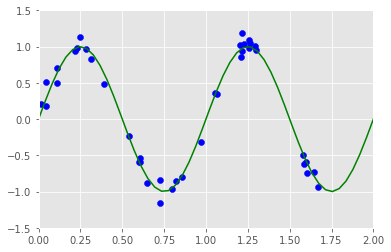

In [3]:
n = 40 # data sets
m = 20 # feature dimension

train_X = np.random.uniform(0,2,n)
train_t = np.sin(2 * np.pi * train_X) + np.random.normal(0, 0.1, n)
plt.scatter(train_X, train_t, c="b")
plt.plot(np.linspace(0,2), np.sin(2 * np.pi * np.linspace(0,2)), c="g")
plt.xlim(0,2)
plt.ylim(-1.5, 1.5)
plt.show()

Ridge Regression

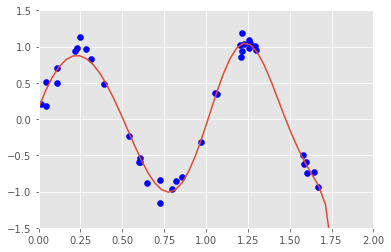

In [20]:
lam = 0.001
def phi_poly(x):
    return x ** np.arange(0, m)

Phi = np.array([phi_poly(x) for x in train_X]) #(N, M)
a = LA.solve(Phi.T@Phi + lam*np.eye(m), Phi.T@train_t)

def model_y(x):
  return a@phi_poly(x)

x = np.linspace(0,2)
y = np.vectorize(model_y)(x)
plt.scatter(train_X, train_t, c="b")
plt.plot(x,y)
plt.xlim(0,2)
plt.ylim(-1.5, 1.5)
plt.show()

kernel Regression

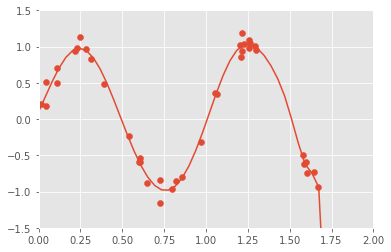

In [32]:
def k(x_, x):
  return ((x_ * x + 1) ** m).sum()
m=20
K = np.zeros([n,n])
for i in range(n):
  temp = [k(train_X[i], train_X[j]) for j in range(n)]
  K[i, :] = temp

a = LA.solve(K + lam * np.eye(n), train_t)

def k_vec(x):
  return np.array(list(map(lambda x_: k(x_, x), train_X)))

def model_y(x):
  return a@k_vec(x)

x = np.linspace(0,2)
y = np.vectorize(model_y)(x)
 
plt.scatter(train_X, train_t)
plt.plot(x, y)
plt.xlim(0, 2)
plt.ylim(-1.5, 1.5)
plt.show()

gauss_kernel

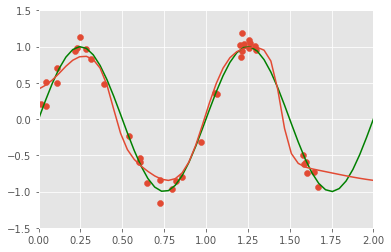

In [33]:
gamma = 50
def gaussian_kernel(x):
  return np.exp(-(x - train_X) ** 2 * gamma)

def model_y(x):
  return gaussian_kernel(x)@train_t / gaussian_kernel(x).sum()

x = np.linspace(0,2)
y = np.vectorize(model_y)(x)
plt.scatter(train_X, train_t)
plt.plot(np.linspace(0,2), np.sin(2 * np.pi * np.linspace(0,2)), c ="g")  #y = sin(2πx)
plt.plot(x, y)
plt.xlim(0, 2)
plt.ylim(-1.5, 1.5)
plt.show()

Parzen Estimation -> kernel regression

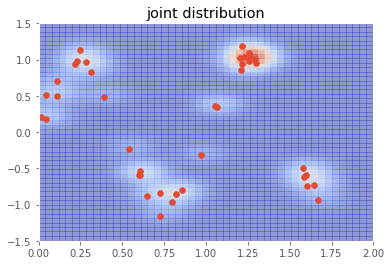

In [38]:
gamma = 50
def gauss_joint(x, t):
  return np.average(np.exp( (-(x - train_X)**2 - (t - train_t) ** 2)* gamma))

def gauss_marginal(x):
  return np.average(np.exp( (-(x - train_X)**2)* gamma))

def gauss_conditional(x, t):
  return gauss_joint(x,t) / gauss_marginal(x)

x, y = np.meshgrid(np.linspace(0,2), np.linspace(-1.5, 1.5))
Z = np.vectorize(gauss_joint)(x,y)
plt.figure(figsize=(6,4))
plt.title("joint distribution")
plt.pcolor(x, y, Z, alpha = 0.5, cmap=cm.coolwarm)
plt.xlim(0, 2)
plt.ylim(-1.5, 1.5)
plt.scatter(train_X, train_t)
plt.show()

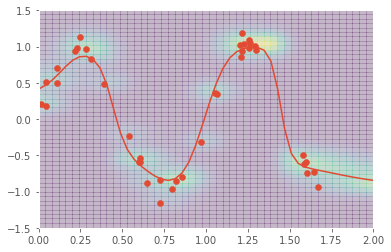

In [39]:
x_ = np.linspace(0,2)
y_ = np.vectorize(model_y)(x_)

x, y = np.meshgrid(np.linspace(0,2), np.linspace(-1.5, 1.5))
Z = np.vectorize(gauss_conditional)(x,y)
plt.figure(figsize=(6,4))
plt.pcolor(x, y, Z, alpha = 0.2)
 
plt.plot(x_, y_)
plt.scatter(train_X, train_t)
plt.xlim(0, 2)
plt.ylim(-1.5, 1.5)
plt.show()